In [2]:
#Importing Required Libraries
import pandas as pd
import pickle

In [3]:
#Loading dataset
df=pd.read_csv('ipl.csv')

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
#Data Cleaning
#Removing unwanted columns
columns_remove=['mid','venue','batsman','bowler','non-striker']
df.drop(labels=columns_remove, axis=1, inplace=True)

In [6]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
#Considering Active Teams
active_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']

In [8]:
#Filtering out inactive teams
df=df[(df['bat_team'].isin(active_teams))&(df['bowl_team'].isin(active_teams))]

In [9]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [10]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,total
32,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,41,222
33,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,41,222
34,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,41,222
35,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,41,222
36,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,41,222


In [11]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [14]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,striker,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,41,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,41,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,41,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,41,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,41,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
encoded_df.columns


Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
#Rearranging Columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [17]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [18]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [19]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [20]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Linear Regression


In [21]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

# Ridge Regression


In [23]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [24]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.36893e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.40015e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.35766e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.52625e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarn

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487925


In [26]:
prediction=ridge_regressor.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

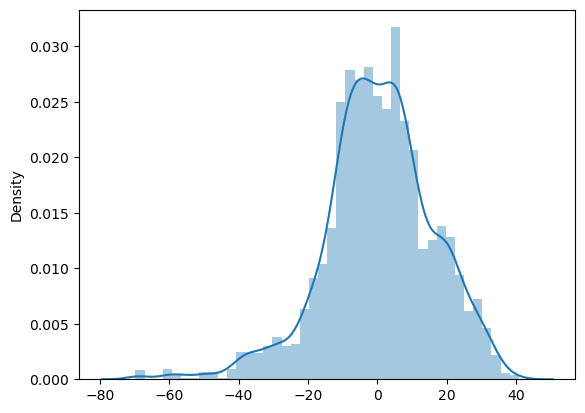

In [27]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [28]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005017
MSE: 251.0317296411275
RMSE: 15.843980864704662
